<a href="https://colab.research.google.com/github/quangcrazymen/CS114.M11/blob/main/FinalProject/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Install dependency


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2.Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [19]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [8]:
draw_landmarks(frame, results)

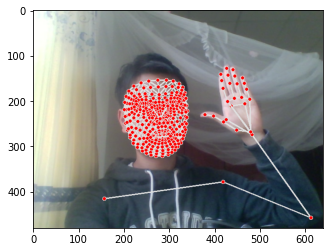

In [9]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
len(results.left_hand_landmarks.landmark)

## 3. Extract Keypoint Values

In [ ]:
results.pose_landmarks

In [49]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [ ]:
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [ ]:
extract_keypoints(results).shape

## 4. Setup Folders for Collection:

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('ActionData') 
#DATA_PATH='H:\My Drive\ActionData'
# Actions that we try to detect
#actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [56]:
actions = np.array(['hello', 'thanks', 'iloveyou'])

In [8]:
actions = np.array(['distant','soap','scattering','stir','happen','community','dead_body','identify','heavy_loading','tattoo','gasoline','invasion','build','bike','watching','collision','velocity','talent','goodbye','book', 'scissors', 'candy','tell','result','possibility','different', 'guest','hotel', 'opening', 'antibiotics', 'towel', 'sew', 'mask', 'scream', 'what', 'leaf', 'letter', 'optimistic', 'drive', 'do_homework', 'can', 'farming', 'work', 'wander', 'waste', 'govern', 'cool', 'old_man', 'clean', 'clean_my_mouth', 'shake_my_head', 'listen', 'silent', 'assemble', 'confused', 'for_a_long_time', 'friction', 'drug', 'blush_cheeks', 'dome', 'black', 'brown', 'white', 'blue','who','nightmare','hero','evil','night','shirt','sweater','bribery','eating','eat stealthily','beggar','article','poem','sand','parking lot','daytime','discussion','foot','gossip','toothbrush','they loves you','finger alphabet','keyboard','hand','sell','they loves me','multiplication table','radius','shark','whale','isolation','mirror','bag'])

In [6]:
actions = np.array(['distant','soap','scattering','stir'])

In [7]:
actions =np.array(['distant','soap','scattering','stir','happen','community','dead_body','identify','heavy_loading','tattoo','gasoline','invasion','build','bike','watching','collision','velocity','talent','goodbye','book', 'scissors', 'candy','tell','result','possibility','different', 'guest','hotel', 'opening', 'antibiotics', 'towel', 'sew', 'mask', 'scream', 'what', 'leaf', 'letter', 'optimistic', 'drive', 'do_homework', 'can', 'farming', 'work', 'wander', 'waste', 'govern', 'cool'])

In [21]:
actions = np.array(['old_man', 'talent','govern','community'])

In [6]:
actions = np.array(['hotel', 'hero','goodbye','guest'])

In [51]:
actions = np.array(['alert', 'who','eat stealthily','daytime'])

In [6]:
actions = np.array(['old_man', 'talent','govern','community','hotel', 'hero','goodbye','guest','alert', 'who','eat stealthily','daytime'])

In [9]:
len(actions)

97

In [70]:
actions = np.array(['book'])

In [71]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [16]:
len(pose)

33

## 5. Collect Keypoint values for training and testing

In [72]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [49]:
cap.release()
cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and features

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [12]:
label_map

{'distant': 0,
 'soap': 1,
 'scattering': 2,
 'stir': 3,
 'happen': 4,
 'community': 5,
 'dead_body': 6,
 'identify': 7,
 'heavy_loading': 8,
 'tattoo': 9,
 'gasoline': 10,
 'invasion': 11,
 'build': 12,
 'bike': 13,
 'watching': 14,
 'collision': 15,
 'velocity': 16,
 'talent': 17,
 'goodbye': 18,
 'book': 19,
 'scissors': 20,
 'candy': 21,
 'tell': 22,
 'result': 23,
 'possibility': 24,
 'different': 25,
 'guest': 26,
 'hotel': 27,
 'opening': 28,
 'antibiotics': 29,
 'towel': 30,
 'sew': 31,
 'mask': 32,
 'scream': 33,
 'what': 34,
 'leaf': 35,
 'letter': 36,
 'optimistic': 37,
 'drive': 38,
 'do_homework': 39,
 'can': 40,
 'farming': 41,
 'work': 42,
 'wander': 43,
 'waste': 44,
 'govern': 45,
 'cool': 46,
 'old_man': 47,
 'clean': 48,
 'clean_my_mouth': 49,
 'shake_my_head': 50,
 'listen': 51,
 'silent': 52,
 'assemble': 53,
 'confused': 54,
 'for_a_long_time': 55,
 'friction': 56,
 'drug': 57,
 'blush_cheeks': 58,
 'dome': 59,
 'black': 60,
 'brown': 61,
 'white': 62,
 'blue': 63

In [12]:
res = np.load(os.path.join(DATA_PATH, "community", str(1), "1.npy".format(1)))
res

In [13]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
X = np.array(sequences)

In [25]:
X.shape

(120, 30, 1662)

In [ ]:
X

In [18]:
y = to_categorical(labels).astype(int)

In [28]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

In [18]:
y_train.shape

(2764, 97)

## 7. Build and train LSTM Neural Network 

In [14]:
# Sequential neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
#filepath="saved_models/KSTBQK_1/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
filepath="saved_models/12Tu-3Cau/weights-improvement-{epoch:02d}-{categorical_accuracy:.2f}.hdf5"

In [95]:
checkpoint = ModelCheckpoint(filepath, monitor='categorical_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor="loss", patience=10, verbose=1)
log_csv = CSVLogger('my_logs.csv', separator=',', append=False)
callbacks_list = [checkpoint, early_stop, log_csv,tb_callback]

In [92]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
del model

In [15]:
# Build Neural Network
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [16]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [98]:
model.fit(X_train,y_train,epochs=2000,callbacks=callbacks_list)

Epoch 1/2000
11/11 [==============================] - 11s 642ms/step - loss: 4.2165 - categorical_accuracy: 0.0585

Epoch 00001: categorical_accuracy improved from -inf to 0.05848, saving model to saved_models/12Tu-3Cau\weights-improvement-01-0.06.hdf5
Epoch 2/2000
11/11 [==============================] - 6s 584ms/step - loss: 2.4468 - categorical_accuracy: 0.0819

Epoch 00002: categorical_accuracy improved from 0.05848 to 0.08187, saving model to saved_models/12Tu-3Cau\weights-improvement-02-0.08.hdf5
Epoch 3/2000
11/11 [==============================] - 6s 557ms/step - loss: 2.4452 - categorical_accuracy: 0.1404

Epoch 00003: categorical_accuracy improved from 0.08187 to 0.14035, saving model to saved_models/12Tu-3Cau\weights-improvement-03-0.14.hdf5
Epoch 4/2000
11/11 [==============================] - 6s 513ms/step - loss: 2.3718 - categorical_accuracy: 0.1725

Epoch 00004: categorical_accuracy improved from 0.14035 to 0.17251, saving model to saved_models/12Tu-3Cau\weights-improve

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 132       
Total params: 596,708
Trainable params: 596,708
Non-trainable params: 0
________________________________________________

## 8. Make Predictions

In [32]:
res = model.predict(X_test)

In [33]:
res

array([[9.89331961e-01, 1.06511544e-02, 5.57282970e-11, 1.68678180e-05],
       [9.87493932e-01, 1.24862362e-02, 5.69747201e-11, 1.98285161e-05],
       [5.54002668e-07, 9.99958158e-01, 2.57749777e-23, 4.12734516e-05],
       [2.24576541e-03, 5.19494601e-02, 2.08518858e-12, 9.45804715e-01],
       [2.48552988e-19, 1.80122267e-24, 9.99999762e-01, 2.50933851e-07],
       [9.86749113e-01, 1.31812822e-02, 1.08570335e-08, 6.95981653e-05]],
      dtype=float32)

In [33]:
actions[np.argmax(res[0])]

'stir'

In [34]:
actions[np.argmax(y_test[0])]

'scattering'

In [52]:
del model

In [51]:
model

In [33]:
model.save('20action.h5')

In [20]:
#model.load_weights('action.h5')
#model.load_weights('20action.h5')
#model.load_weights('saved_models/weights-improvement-23-0.59.hdf5')
#98 words
#model.load_weights('saved_models/4actions/weights-improvement-13-0.73.hdf5')
#model.load_weights('saved_models/OGTNLDXH_2/weights-improvement-18-0.97.hdf5')
#model.load_weights('saved_models/12Tu-3Cau/weights-improvement-76-1.00.hdf5')
model.load_weights('saved_models/97Tu_2/weights-improvement-89-0.79.hdf5')


## 9. Save Weights

## 10. Evaluation using Confusion matrix and Accuracy

In [21]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
yhat = model.predict(X_test)

In [23]:
ytrue = np.argmax(y_test,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

In [26]:
confusion_matrix(ytrue,yhat)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[5, 0],
        [0, 1]],

       [[2, 1],
        [0, 3]],

       [[4, 0],
        [1, 1]]], dtype=int64)

In [27]:
accuracy_score(ytrue,yhat)

0.7808219178082192

## 11. Test in real time

In [35]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
        #sequence.append(keypoints)
        #sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                   sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
            cv2.imshow('OpenCV Feed', image)

        # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


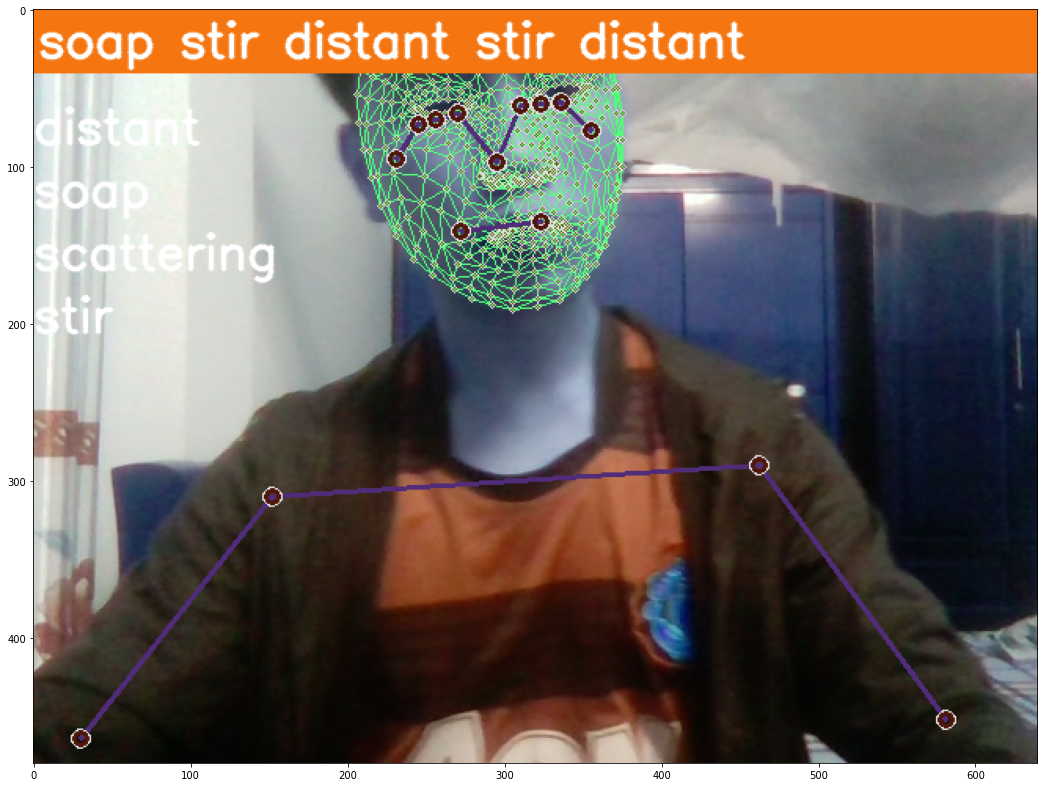

In [33]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [45]:
from scipy import stats

In [13]:
colors = [(245,117,16), (117,245,16), (16,117,245),(16,234,56)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[2], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [15]:
cap.release()
cv2.destroyAllWindows()

In [ ]:

# import required module
from playsound import playsound
  
# for playing note.mp3 file
playsound('D:/School/MachineLearning/CS114.M11/FinalProject/sound/community.wav')
playsound('D:/School/MachineLearning/CS114.M11/FinalProject/sound/goodbye.mp3')
playsound('D:/School/MachineLearning/CS114.M11/FinalProject/sound/goodbye.wav')
playsound('D:/School/MachineLearning/CS114.M11/FinalProject/sound/alert.wav')
playsound('D:/School/MachineLearning/CS114.M11/FinalProject/sound/daytime.wav')
playsound('D:/School/MachineLearning/CS114.M11/FinalProject/sound/govern.wav')
playsound('D:/School/MachineLearning/CS114.M11/FinalProject/sound/govern.mp3')
playsound('D:/School/MachineLearning/CS114.M11/FinalProject/sound/talent.mp3')

#playsound('D:/School/MachineLearning/CS114.M11/FinalProject/Inside-Boy.mp3')
print('playing sound using  playsound')
#filepath="saved_models/12Tu-3Cau/weights-improvement-{epoch:02d}-{categorical_accuracy:.2f}.hdf5"

In [16]:
# 1. New detection variables
from playsound import playsound
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            #print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                            filepath = 'D:/School/MachineLearning/CS114.M11/FinalProject/sound/{0}.mp3'.format(actions[np.argmax(res)])
                            try:
                                playsound(filepath)
                            except:
                                pass
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


    Error 259 for command:
        play D:/School/MachineLearning/CS114.M11/FinalProject/sound/govern.mp3 wait
    The driver cannot recognize the specified command parameter.

    Error 263 for command:
        close D:/School/MachineLearning/CS114.M11/FinalProject/sound/govern.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: D:/School/MachineLearning/CS114.M11/FinalProject/sound/govern.mp3

    Error 265 for command:
        open D:/School/MachineLearning/CS114.M11/FinalProject/sound/govern.mp3
    The device name is already being used as an alias by this application.  Use a unique alias.

    Error 263 for command:
        close D:/School/MachineLearning/CS114.M11/FinalProject/sound/govern.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: D:/School/MachineLearning/CS114.M11/FinalProject/sound/govern.mp3

    Error 265 for command:
        open D:/School/MachineLearning/CS114.M11/FinalProjec